In [4]:
import tensorflow as tf

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

In [15]:
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [18]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
mnist.train.num_examples

55000

mnist.test.num_examples

In [23]:
mnist.validation.num_examples

5000

In [24]:
import matplotlib.pyplot as plt

In [25]:
mnist.train.images[1].shape

(784,)

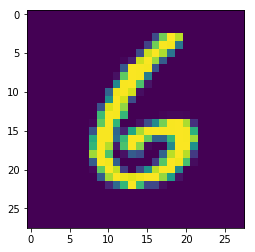

In [27]:
plt.imshow(mnist.train.images[1000].reshape(28,28))

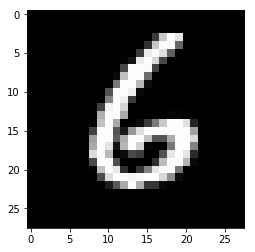

In [28]:
plt.imshow(mnist.train.images[1000].reshape(28,28),cmap="gist_gray")

## Create the MOdel

In [29]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [32]:
#weight
#10 because 0-9 possible numbers
w = tf.Variable(tf.zeros([784,10]))

In [33]:
#bias
b = tf.Variable(tf.zeros([10]))

In [35]:
#Create the Graph
y = tf.matmul(x,w) + b

### Loss and Optimizer

In [37]:
y_true = tf.placeholder(tf.float32,[None,10])

### Cross Entropy

In [38]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits=y))

In [39]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)

In [40]:
train = optimizer.minimize(cross_entropy)

# Create Session

In [41]:
init = tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    sess.run(init)
    # Train the model for 1000 steps on training set
    # using built in batch feeder from mnist for convenience
    for step in range(1000):
        
        batch_x , batch_y =mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    
    #Test the train Model
    
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9209
